In [268]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [269]:
mpg = pd.read_csv("gdrive/MyDrive/mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [270]:
mpg.groupby('manufacturer',as_index=False).agg(cty_mean = ('cty','mean'))

,manufacturer,cty_mean
0,audi,17.611111
1,chevrolet,15.000000
2,dodge,13.135135
3,ford,14.000000
4,honda,24.444444
5,hyundai,18.642857
6,jeep,13.500000
7,land rover,11.500000
8,lincoln,11.333333
9,mercury,13.250000


In [271]:
#집단을 다시 집단으로 나누기
#groupby('컬럼1')은 집단 1개로 나누는 거고
#groupby(['컬럼1','컬럼2']) => 컬럼1의 값 종류별로 나눈 후에 컬럼2로 나누기


In [272]:
#제조사별/구동방식별 도시연비 출력
mpg.groupby(['manufacturer','drv'],as_index=False).agg(mean= ('cty','mean'))

,manufacturer,drv,mean
0,audi,4,16.818182
1,audi,f,18.857143
2,chevrolet,4,12.500000
3,chevrolet,f,18.800000
4,chevrolet,r,14.100000
5,dodge,4,12.000000
6,dodge,f,15.818182
7,ford,4,13.307692
8,ford,r,14.750000
9,honda,f,24.444444


In [273]:
#연습) 제조사가 아우디인 것의 구동방식별 개수
mpg.query('manufacturer=="audi"').groupby('drv',as_index=False).agg(count=('drv','count'))

,drv,count
0,4,11
1,f,7


In [274]:
# 집단별로 개수 구할 때는 value_counts()를 이용할 수도 잇다
mpg.query('manufacturer=="audi"')['drv'].value_counts()

4    11
f     7
Name: drv, dtype: int64

In [275]:
#구동방식별 개수 출력
mpg.groupby('drv').agg(count=('drv','count'))

,count
drv,
4,103
f,106
r,25


In [276]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [277]:
mpg.groupby('drv').agg(count=('drv','count')).query('count>=100')

,count
drv,
4,103
f,106


In [278]:
#  시리즈를 데이터프레임으로 만들고 싶다면? to_frame()
mpg['drv'].value_counts().to_frame('n')

,n
f,106
4,103
r,25


In [279]:
mpg['drv'].value_counts().to_frame('n').query('n>=100')

,n
f,106
4,103


In [280]:
# 카테고리별 값의 종류별 개수
mpg.groupby('category').agg(count = ('category','count'))

,count
category,
2seater,5
compact,47
midsize,41
minivan,11
pickup,33
subcompact,35
suv,62


In [281]:
mpg['category'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: category, dtype: int64

In [282]:
# 연습) suv차종의 통합연비가 가장 높은 5개의 자동차
mpg['total'] = (mpg['cty']+mpg['hwy'])/2
mpg.query('category=="suv"').sort_values('total',ascending=False).head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,23.5
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,23.0
162,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv,22.0
159,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv,21.5
160,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv,21.0


In [283]:
#방법2)
mpg.query('category=="suv"')\
.assign(total = ((mpg['cty']+mpg['hwy'])/2))\
.sort_values('total',ascending=False).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv,23.5
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,23.0
162,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv,22.0
159,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv,21.5
160,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv,21.0


In [284]:
# suv차종의 제조사별로 통합연비 평균이 높은 제조사 5개
# mpg.query('category=="suv"')\
# .assign(total = (mpg['cty']+mpg['hwy'])/2)
# mpg = mpg.groupby('manufacturer',as_index=False).agg(avg= ('total','mean'))
# mpg.sort_values(['avg'],ascending=False)
#????엥 이거 망함
#연습) suv 차종의 제조사별로 통합연비의 평균이 높은 5개의 제조사를 출력
mpg.query('category=="suv"')\
.assign(total=(mpg['cty']+mpg['hwy'])/2)\
.groupby('manufacturer',as_index=False)\
.agg(mean_total=('total','mean')).sort_values('mean_total',ascending=False).head(5)

,manufacturer,mean_total
8,subaru,21.916667
9,toyota,16.312500
7,nissan,15.875000
6,mercury,15.625000
3,jeep,15.562500


In [285]:
test1 = pd.DataFrame({
    'id' : [1,2,3,4,5],
    'name': ['a','b','c','d','e'],
    'midterm':[60,70,80,90,100]
})
test2 = pd.DataFrame({
    'id' :[1,2,3,4,5],
    'name' :['a','b','c','d','e'],
    'final':[70,83,65,95,80]
})

In [286]:
# a =  pd.merge(test1,test2, how='left')
a =  pd.merge(test1,test2, how='inner', on='id')
a

,id,name_x,midterm,name_y,final
0,1,a,60,a,70
1,2,b,70,b,83
2,3,c,80,c,65
3,4,d,90,d,95
4,5,e,100,e,80


In [287]:
# how = 에 들어갈 수 있는 값 left, right, outer, inner
a = pd.merge(test1,test2,how='outer')
a

,id,name,midterm,final
0,1,a,60,70
1,2,b,70,83
2,3,c,80,65
3,4,d,90,95
4,5,e,100,80


In [288]:
import numpy as np

In [289]:
df = pd.DataFrame({
    'sex':['M','F', np.nan, 'M','F'], #결측치 직접 넣을 때 np.nan일케넣음
    'score':[5,4,3,4,np.nan]
})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [290]:
# 결측치는 연산해도 결측치가 됩니다
df['score']+1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [291]:
#데이터 분석 하기 앞서 수집한 데이터에 결측치가 있는지 먼저 파악을 해야 한다
#그 결측치를 지우든지... 다른 값으로 대체해야 한다.

In [292]:
# isna
# df.isna()
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [293]:
#근데 위처럼 하는 것도 번거로워서 각 컬럼별로 결측치의 수를 확인한다
# pd.isna(df) # bool배열로 나옴
pd.isna(df).sum() #각 컬럼별로 결측치의 수 알려줌

sex      1
score    1
dtype: int64

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4 non-null      object 
 1   score   4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [295]:
# 결측치 제거하기
# df.dropna(subset = ['삭제하려는컬럼1','컬럼2',....])

In [296]:
# 점수에 대한 결측치 제거해서 새 데이터프레임에 저장하자
df_nomiss = df.dropna(subset=['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [297]:
#성별과 점수에 대한 결측치 삭제해서 새 df에 담아보세여
dfnew = df.dropna(subset=['score','sex'])
dfnew

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [298]:
dfnomissAll = df.dropna()
dfnomissAll

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [299]:
#성별별로 점수 합과 평균 출력
df.pivot_table(values='score', index='sex',aggfunc=['sum','mean'] )

,sum,mean
,score,score
sex,,
F,4.0,4.0
M,9.0,4.5


In [300]:
#밥업2)
df.groupby('sex').agg(sum = ('score','sum'), mewn = ('score','mean'))

,sum,mewn
sex,,
F,4.0,4.0
M,9.0,4.5


In [301]:
exam = pd.read_csv("gdrive/MyDrive/exam.csv")

In [302]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [314]:
# 실습을 위해 2,7,14행의 math를 결측치로 설정해보자
exam.loc[[2,7,14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [304]:
# 결측치 확인하기
exam.isna().sum()

id         0
nclass     0
math       3
english    0
science    0
dtype: int64

In [305]:
#수학의 평균값 구한 다음 결측치 값을 대체하자
exam['math'].mean()

55.23529411764706

In [306]:
#fillna(값) 결측치를 다른 값으로 설정하기

In [307]:
exam['math'] = exam['math'].fillna(55)

In [308]:
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [310]:
exam.isna().sum()

id         0
nclass     0
math       0
english    0
science    0
dtype: int64

In [311]:
# 이상치Outlier
# 이상치는 논리적으로 불가능한 값일 수도 있고, 가능은하지만 너무 동떨어져 있는 데이터일수도 있다

In [318]:
# sex  = 1,2
# score = 1-5 가 정상범위라고 하자

In [319]:
#실습을 위해 성별, 점수에 각각 이상치가 있는 데이터프레임을 만들어보자.
df = pd.DataFrame({
    'sex' :[1,2,1,3,1,2],
    'score' :[5,4,4,5,2,6]
})

In [320]:
df

,sex,score
0,1,5
1,2,4
2,1,4
3,3,5
4,1,2
5,2,6


In [321]:
# 이상치 있는지 확인하기
# 값의 종류별 빈도수 파악해봄
df['sex'].value_counts()

1    3
2    2
3    1
Name: sex, dtype: int64

In [322]:
# 성별에는 1,2만 와야 하는데 이상한 값 3이 있더라.

In [323]:
df['score'].value_counts()

5    2
4    2
2    1
6    1
Name: score, dtype: int64

In [324]:
# value_counts()는 빈도수 높은 순으로 자동으로 글케나옴
# index순으로 보고 싶으면? value_counts().sort_index() 하면댐
df['score'].value_counts().sort_index()

2    1
4    2
5    2
6    1
Name: score, dtype: int64

In [325]:
# 이상치를 결측치로 처리해 보자
#np의 if조건같은 where를 써서 만약의 sex값이 3이면 nan값을 넣고 아니면 그냥 둬라 라는 뜻
df['sex'] = np.where(df['sex']==3,np.nan,df['sex'])

In [327]:
df['score'] = np.where(df['score']>5,np.nan,df['score'])

In [328]:
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,4.0
3,NaN,5.0
4,1.0,2.0
5,2.0,NaN


In [332]:
#결측치 제거하고 요약통계량을 확인해보자 -> 성별별 점수의 평균 출력하기
df = df.dropna()
df.groupby('sex').agg(mean = ('score','mean'))

,mean
sex,
1.0,3.666667
2.0,4.000000


In [333]:
df = pd.DataFrame({
    'x1':[1,1,2,2]
})
df

,x1
0,1
1,1
2,2
3,2


In [334]:
# 연습) x1값 1이면 a, 아니면 결측치를 갖는 x2변수를 추가하자
df['x2']= np.where(df['x1']==1,'a',np.nan)
df #=> ㅋ..이 nan은 진짜 NaN이 아니다

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [335]:
df['x2'].isna().sum()

0

In [337]:
# df['score'] = np.where(df['score']>5,np.nan,df['score'])
# 여기서 np.nan은 NaN으로 진짜 NaN으로 들어가거든
# 근데 df['x2']= np.where(df['x1']==1,'a',np.nan)
# 여기서 np.nan은 nan으로 걍 문자열이야
# 왜냐ㅕ면 np.where로 문자열이랑 NaN을 함께 설정할 수가 없어서그럼.
# 다른 글자로 설정한 후에 변경을 해야댐.... 미친


In [338]:
df = pd.DataFrame({
    'x1':[1,1,2,2]
})
df

,x1
0,1
1,1
2,2
3,2


In [342]:
df['x2']= np.where(df['x1']==1,'a','etc')
df['x2'] = df['x2'].replace('etc',np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [343]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [344]:
#데이터분석 시 숫자보다 그래프를 그리면 더 직관적잊
# seaborn을 이용해 데이터 파악하기
import seaborn as sns

<Axes: ylabel='hwy'>

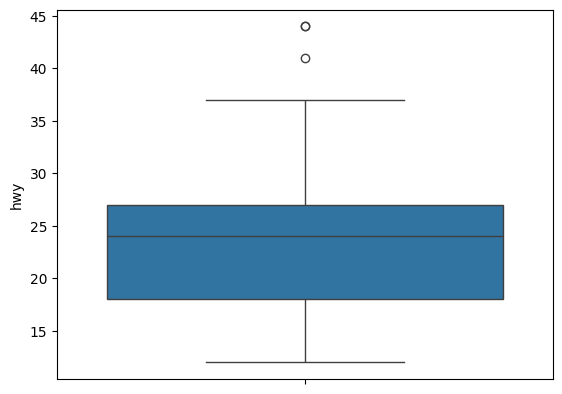

In [345]:
# 고속도로 연비에 대해 극단치가 있는지 확인해보자
# 그림을 그리는 게 좋겟다..
# 상자 그림: 값의 분포를 사각형으로 그려줌: 사분위값(최소, 25, 50, 75, 최대) 나옴. 극단치는 점으로.,
# sns.boxplot(data=데이터프레임, y='컬럼')
sns.boxplot(data=mpg, y='hwy')

In [346]:
#3사분위값을 확인해보자. 작은것부터 시작해 0.75임
# quantile()

In [348]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [349]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [351]:
# IQR(사분위 범위 수) : 데이터의 중간 50% (Q3 - Q1)
iqr = pct75-pct25
iqr

9.0

In [352]:
# 극단치 하한 경계값 => Q1 - 1.5 *IQR
# 극단치 상한 경계값 => Q3 + 1.5 *IQR


In [353]:
lower_limit = pct25 - 1.5*iqr
lower_limit

4.5

In [354]:
upper_limit = pct75 + 1.5*iqr
upper_limit

40.5

In [355]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [357]:
mpg['hwy'] = np.where((mpg['hwy']>upper_limit)|(mpg['hwy']<lower_limit),np.nan,mpg['hwy'])

In [358]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             3
fl              0
category        0
total           0
dtype: int64

In [365]:
# 고속도로 연비에 대해 결측치 제거하고 구동방식별로 고속도로 연비의 평균 출력
# mpg = mpg.dropna(subset = ['hwy'])
# mpg.groupby('drv').agg(mean = ('hwy','mean'))
# mpg
mpg.dropna(subset = ['hwy'])\
.groupby('drv').agg(mean = ('hwy','mean'))

,mean
drv,
4,19.174757
f,27.728155
r,21.000000


In [366]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize,23.5
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize,25.0
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize,21.0
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize,22.0


,mean
drv,
4,19.174757
f,27.728155
r,21.000000
